
## **Hospitality Analysis**

---



In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing files

hd_date = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/dim_date.csv')
hd_hotels = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/dim_hotels.csv')
hd_rooms = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/dim_rooms.csv')
hd_bookings = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/fact_bookings.csv')
hd_bookings_agg = pd.read_csv('https://raw.githubusercontent.com/NikhilM-632/ik-files/main/fact_aggregated_bookings.csv')

In [3]:
hd_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [4]:
hd_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


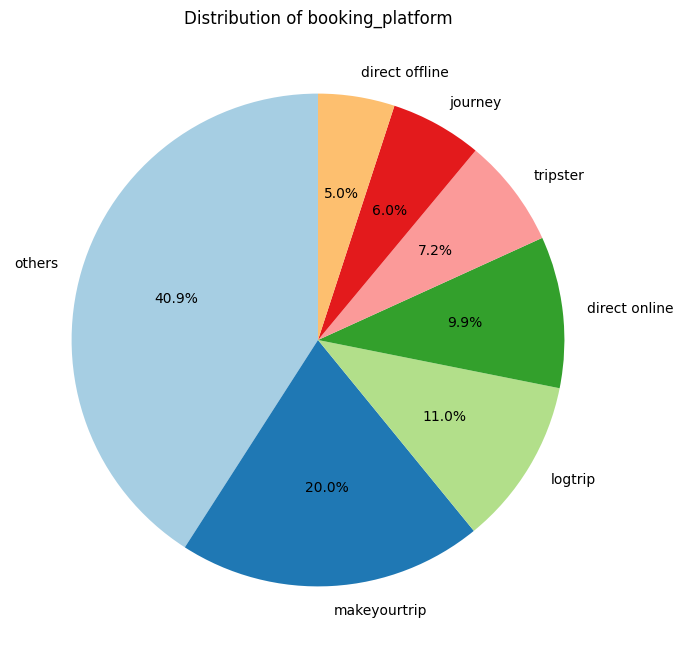

In [5]:
# Count the occurrences of each unique value in the specified column
platform_counts = hd_bookings['booking_platform'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Distribution of booking_platform')
plt.show()

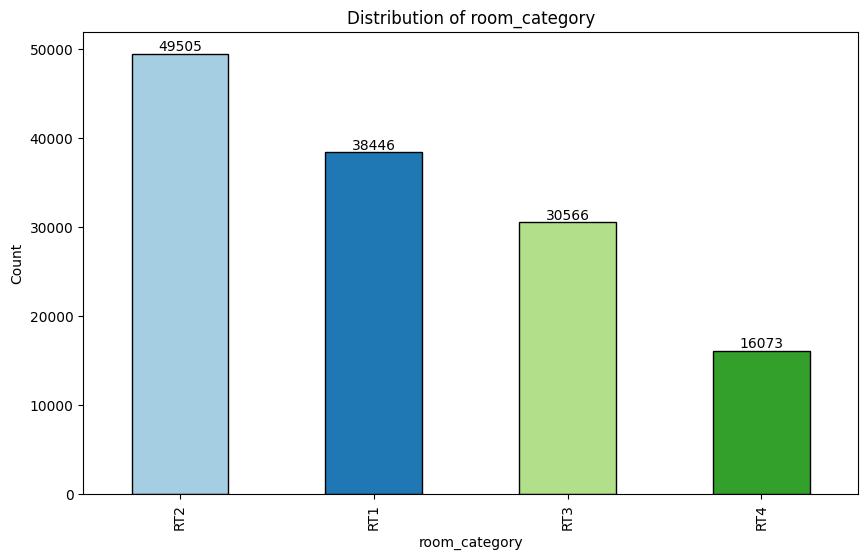

In [6]:
# Count the occurrences of each unique value in the specified column
room_category_counts = hd_bookings['room_category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = room_category_counts.plot(kind='bar', edgecolor='black', color=plt.cm.Paired.colors)
plt.xlabel('room_category')
plt.ylabel('Count')
plt.title(f'Distribution of room_category')

# Adding counts on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()


In [7]:
# Replace 'checkout_date' and 'check_in_date' with the actual column names in your dataset
hd_bookings['checkout_date'] = pd.to_datetime(hd_bookings['checkout_date'])
hd_bookings['check_in_date'] = pd.to_datetime(hd_bookings['check_in_date'])

# Calculate the difference in days and store it in a new column 'stay_duration'
hd_bookings['stay_duration'] = (hd_bookings['checkout_date'] - hd_bookings['check_in_date']).dt.days

# Display the modified dataframe
print(hd_bookings)

               booking_id  property_id booking_date check_in_date  \
0        May012216558RT11        16558   2022-04-27    2022-05-01   
1        May012216558RT12        16558   2022-04-30    2022-05-01   
2        May012216558RT13        16558   2022-04-28    2022-05-01   
3        May012216558RT14        16558   2022-04-28    2022-05-01   
4        May012216558RT15        16558   2022-04-27    2022-05-01   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564   2022-07-29    2022-07-31   
134586   Jul312217564RT47        17564   2022-07-30    2022-07-31   
134587   Jul312217564RT48        17564   2022-07-30    2022-07-31   
134588   Jul312217564RT49        17564   2022-07-29    2022-07-31   
134589  Jul312217564RT410        17564   2022-07-31    2022-07-31   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
0         2022-05-02          3           RT1    direct online            1.0   
1        

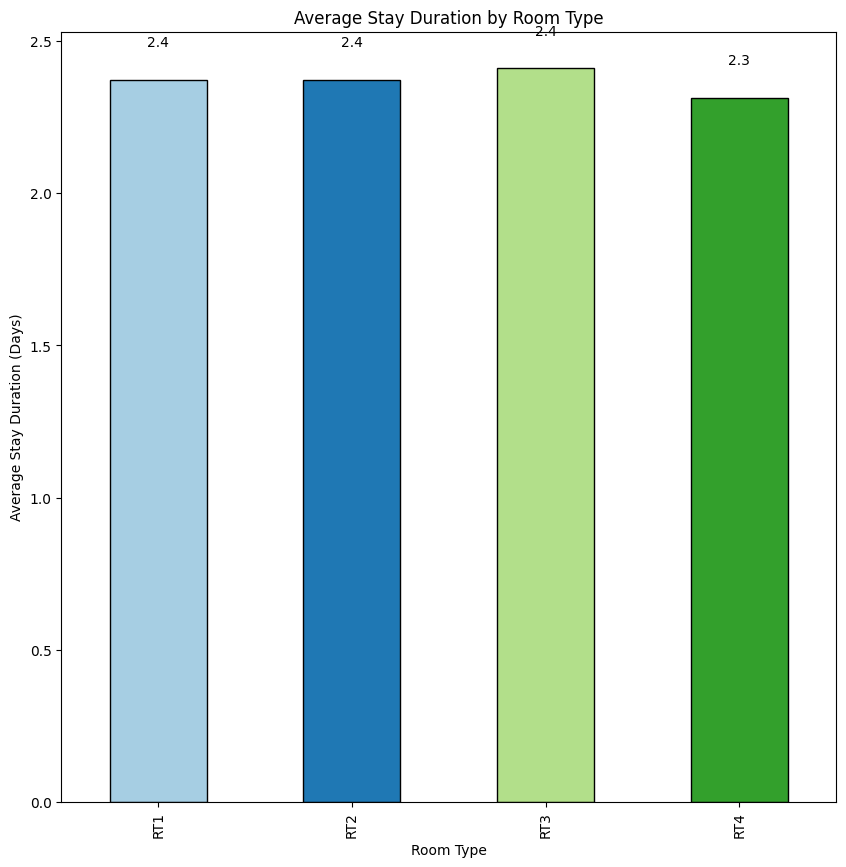

In [8]:
# Calculate the average stay duration for each room type
average_stay_duration_by_room = hd_bookings.groupby('room_category')['stay_duration'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 10))
bars = average_stay_duration_by_room.plot(kind='bar', edgecolor='black', color=plt.cm.Paired.colors)
plt.xlabel('Room Type')
plt.ylabel('Average Stay Duration (Days)')
plt.title('Average Stay Duration by Room Type')

# Adding counts on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

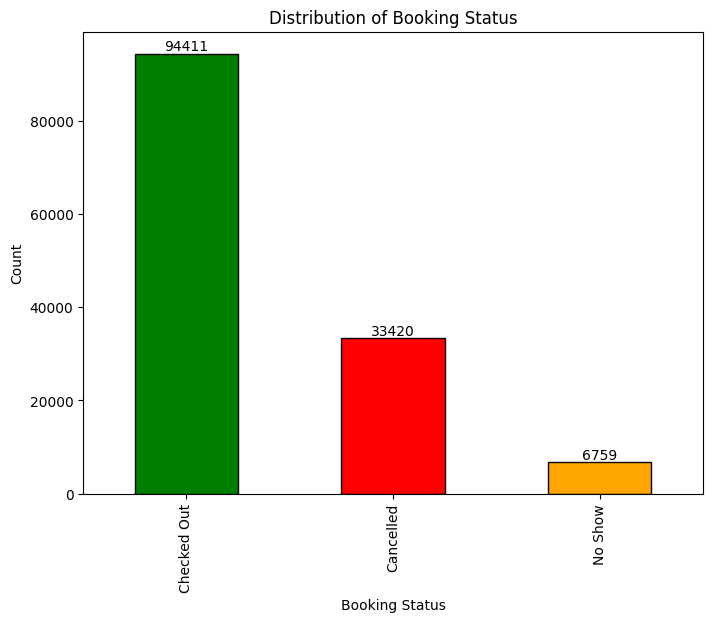

In [9]:
# Count the occurrences of each unique value in the specified column
booking_status_counts = hd_bookings['booking_status'].value_counts()

# Define custom colors
custom_colors = ['green', 'red', 'orange']

# Plotting the bar chart with custom colors
plt.figure(figsize=(8, 6))
bars = booking_status_counts.plot(kind='bar', edgecolor='black', color=custom_colors)
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Distribution of Booking Status')

# Adding counts on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

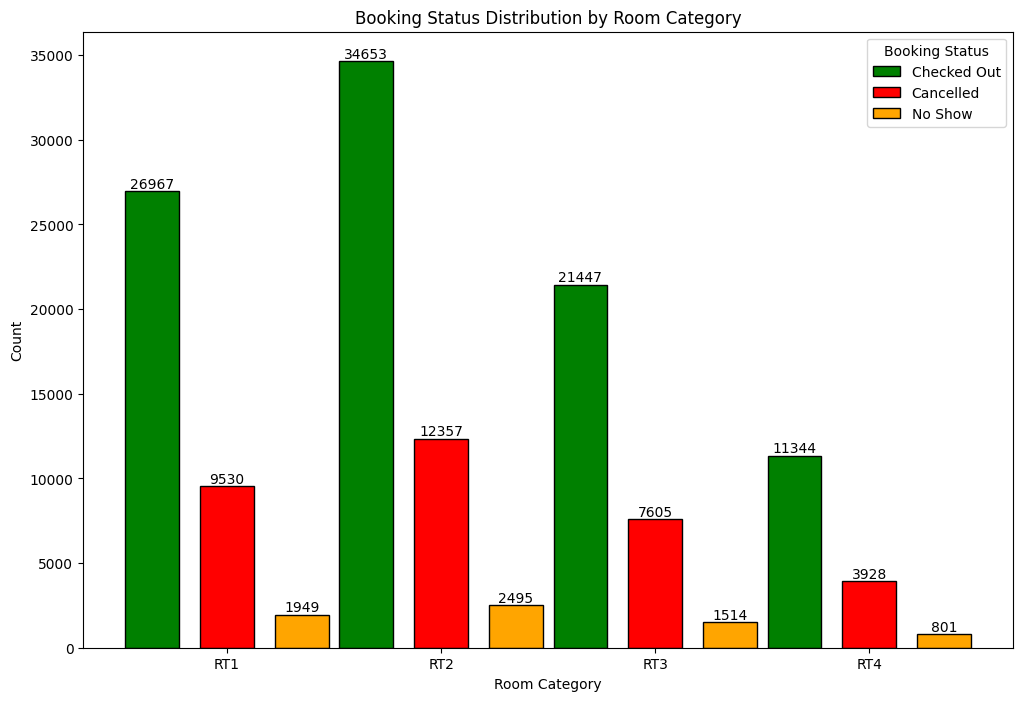

In [10]:
# Count the occurrences of each unique combination of room_category and booking_status
counts = hd_bookings.groupby(['room_category', 'booking_status']).size().unstack().fillna(0)

# Plotting the grouped (multiple) bar chart with gap and displaying count on top
bar_width = 0.25
gap = 0.1  # Adjust the gap as needed
index = np.arange(len(counts.index))

plt.figure(figsize=(12, 8))

bars1 = plt.bar(index - bar_width - gap, counts['Checked Out'], bar_width, label='Checked Out', edgecolor='black', color='Green')
bars2 = plt.bar(index, counts['Cancelled'], bar_width, label='Cancelled', edgecolor='black', color='Red')
bars3 = plt.bar(index + bar_width + gap, counts['No Show'], bar_width, label='No Show', edgecolor='black', color='Orange')

plt.xlabel('Room Category')
plt.ylabel('Count')
plt.title('Booking Status Distribution by Room Category')

# Adding counts on top of the bars
for bars, column_name in zip([bars1, bars2, bars3], counts.columns):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.xticks(index, counts.index)
plt.legend(title='Booking Status')
plt.show()

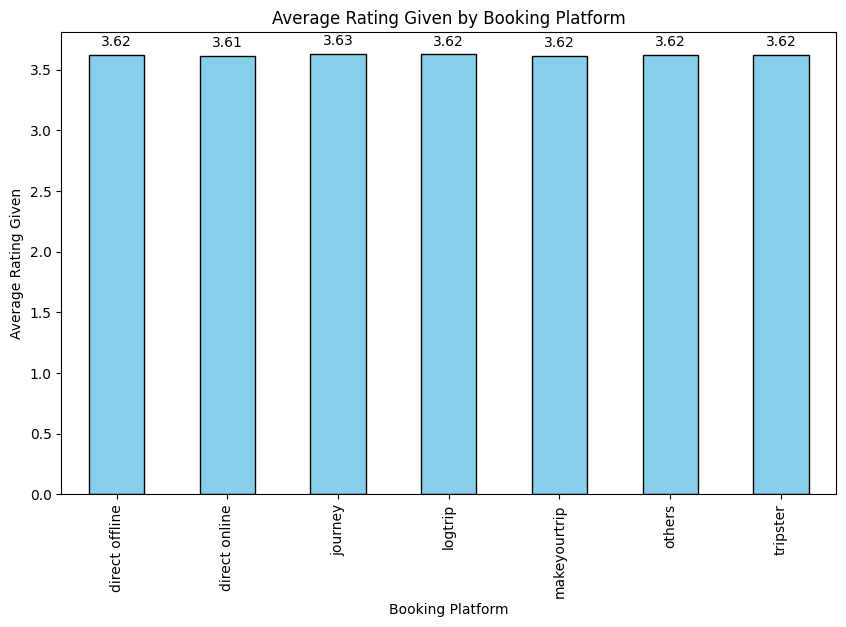

In [11]:
# Convert 'rating_given' column to numeric if it's not already
hd_bookings['ratings_given'] = pd.to_numeric(hd_bookings['ratings_given'], errors='coerce')

# Group by 'booking_platform' and calculate the average rating for each group
average_rating_by_platform = hd_bookings.groupby('booking_platform')['ratings_given'].mean()

# Plotting the bar chart with average ratings and values on top
plt.figure(figsize=(10, 6))
bars = average_rating_by_platform.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Booking Platform')
plt.ylabel('Average Rating Given')
plt.title('Average Rating Given by Booking Platform')

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

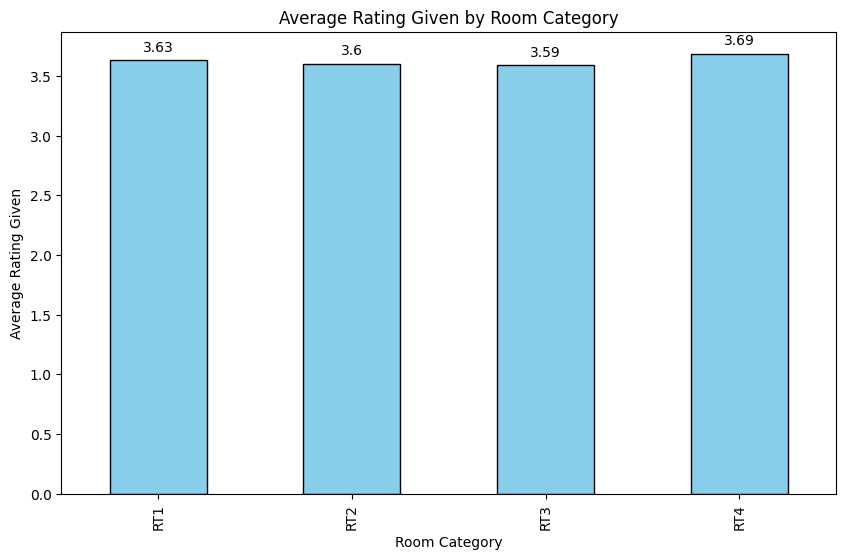

In [12]:
# Convert 'ratings_given' column to numeric if it's not already
hd_bookings['ratings_given'] = pd.to_numeric(hd_bookings['ratings_given'], errors='coerce')

# Group by 'room_category' and calculate the average rating for each group
average_rating_by_room_category = hd_bookings.groupby('room_category')['ratings_given'].mean()

# Plotting the bar chart with average ratings and values on top
plt.figure(figsize=(10, 6))
bars = average_rating_by_room_category.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Room Category')
plt.ylabel('Average Rating Given')
plt.title('Average Rating Given by Room Category')

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

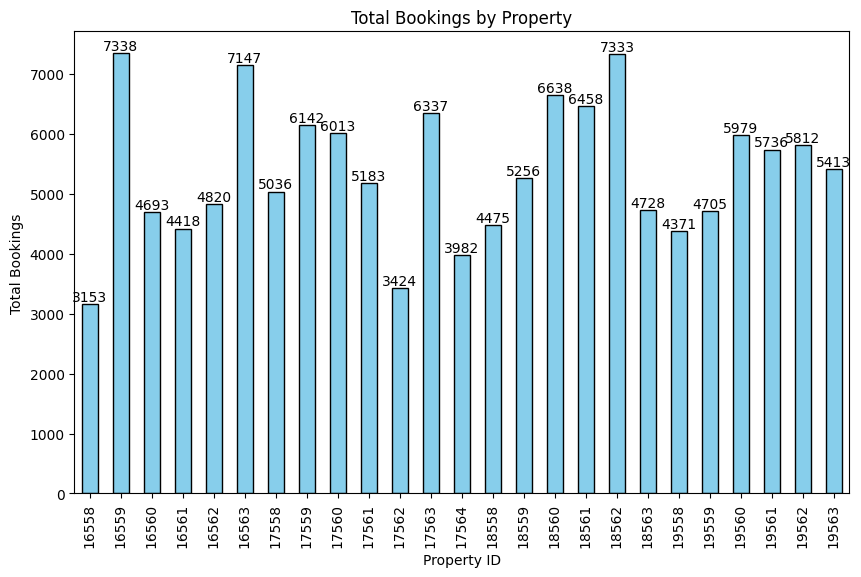

In [13]:
# Group by 'property_id' and calculate the count of bookings for each property
total_bookings_by_property = hd_bookings.groupby('property_id')['booking_id'].count()

# Plotting the bar chart with total bookings and values on top
plt.figure(figsize=(10, 6))
bars = total_bookings_by_property.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Property ID')
plt.ylabel('Total Bookings')
plt.title('Total Bookings by Property')

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

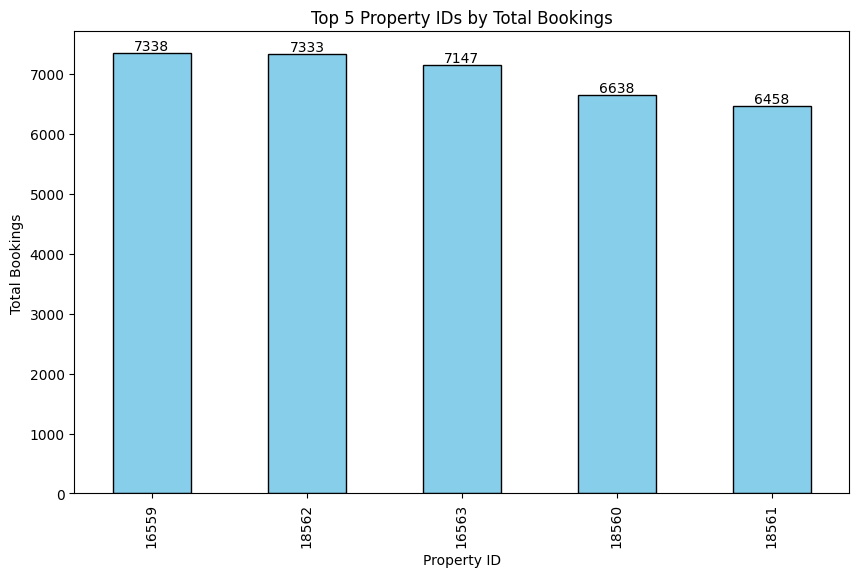

In [14]:
# Group by 'property_id' and calculate the count of bookings for each property
total_bookings_by_property = hd_bookings.groupby('property_id')['booking_id'].count()

# Get the top 5 property IDs based on total bookings
top5_property_ids = total_bookings_by_property.nlargest(5)

# Plotting the bar chart with top 5 property IDs and values on top
plt.figure(figsize=(10, 6))
bars = top5_property_ids.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Property ID')
plt.ylabel('Total Bookings')
plt.title('Top 5 Property IDs by Total Bookings')

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

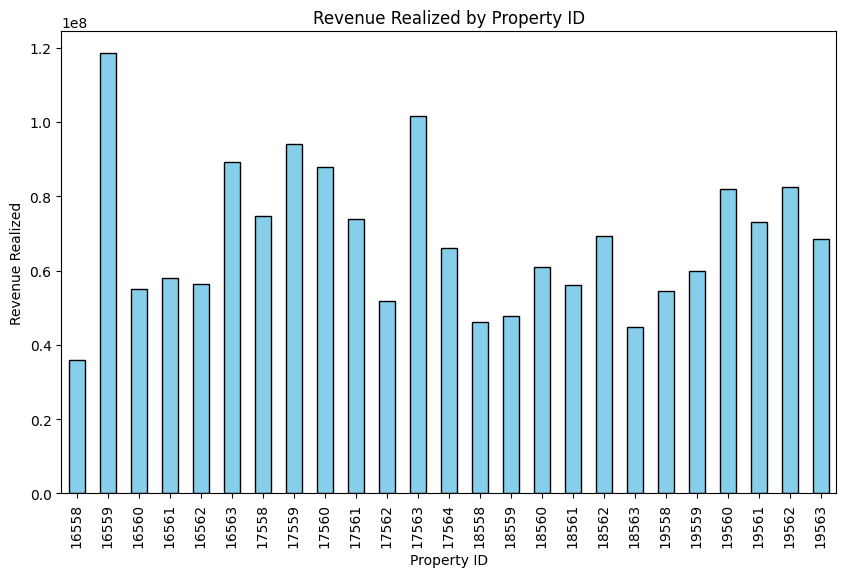

In [15]:
# Group by 'property_id' and calculate the sum of 'revenue_realized' for each property
revenue_by_property = hd_bookings.groupby('property_id')['revenue_realized'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
revenue_by_property.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Property ID')
plt.ylabel('Revenue Realized')
plt.title('Revenue Realized by Property ID')
plt.show()

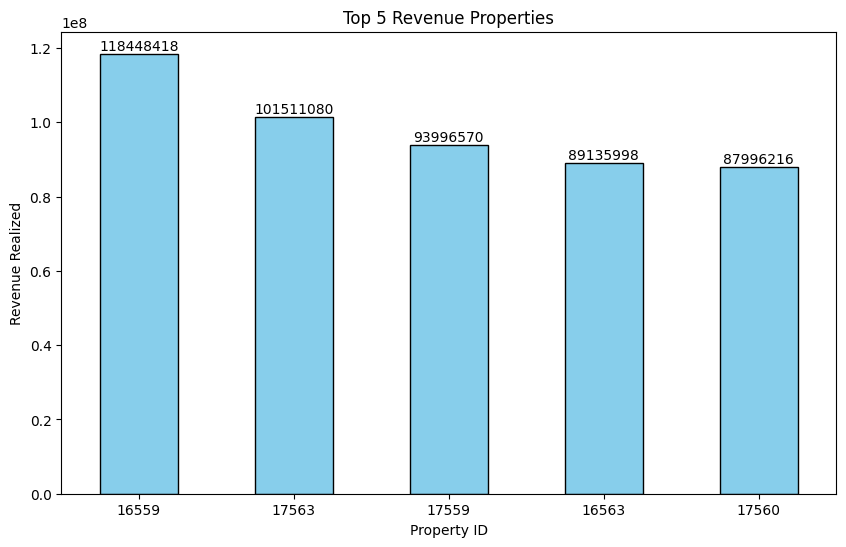

In [16]:
# Group by 'property_id' and calculate the sum of 'revenue_realized' for each property
revenue_by_property = hd_bookings.groupby('property_id')['revenue_realized'].sum()

# Get the top 5 revenue properties
top5_properties = revenue_by_property.nlargest(5)

# Plotting the bar chart for the top 5 revenue properties
plt.figure(figsize=(10, 6))
bars = top5_properties.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Property ID')
plt.ylabel('Revenue Realized')
plt.title('Top 5 Revenue Properties')
plt.xticks(rotation=0)

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

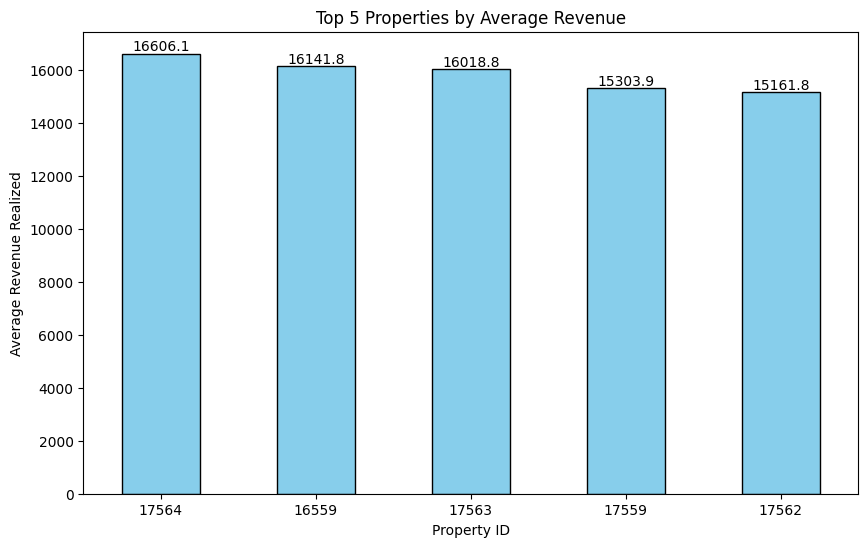

In [17]:
# Group by 'property_id' and calculate the average of 'revenue_realized' for each property
average_revenue_by_property = hd_bookings.groupby('property_id')['revenue_realized'].mean()

# Get the top 5 revenue properties
top5_properties = average_revenue_by_property.nlargest(5)

# Plotting the bar chart for the top 5 revenue properties
plt.figure(figsize=(10, 6))
bars = top5_properties.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Property ID')
plt.ylabel('Average Revenue Realized')
plt.title('Top 5 Properties by Average Revenue')
plt.xticks(rotation=0)

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

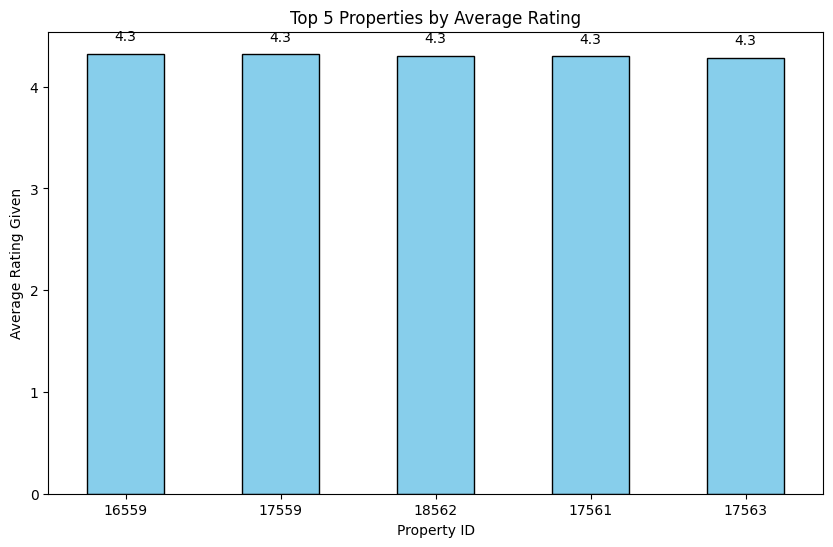

In [18]:
# Group by 'property_id' and calculate the average of 'rating_given' for each property
average_rating_by_property = hd_bookings.groupby('property_id')['ratings_given'].mean()

# Get the top 5 properties with the highest average ratings
top5_properties = average_rating_by_property.nlargest(5)

# Plotting the bar chart for the top 5 properties by average ratings
plt.figure(figsize=(10, 6))
bars = top5_properties.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Property ID')
plt.ylabel('Average Rating Given')
plt.title('Top 5 Properties by Average Rating')
plt.xticks(rotation=0)

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

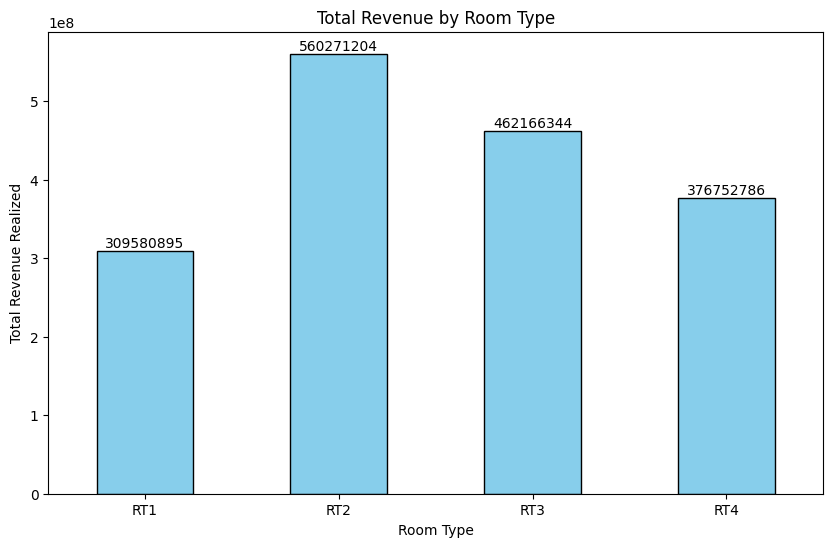

In [19]:
# Group by 'room_category' and calculate the sum of 'revenue_realized' for each room type
total_revenue_by_room = hd_bookings.groupby('room_category')['revenue_realized'].sum()

# Plotting the bar chart for total revenue per room type
plt.figure(figsize=(10, 6))
bars = total_revenue_by_room.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Total Revenue Realized')
plt.title('Total Revenue by Room Type')
plt.xticks(rotation=0)

# Adding values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 1), ha='center', va='bottom', color='black', fontsize=10)

plt.show()

In [21]:
#Export the final dataframe
hd_bookings.to_csv('Hospitality_Final.csv', index=False)